<br>
here we importing the all lib in the dataframe

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
# from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap # here it for the color the heatmap
# from pandas_profiling import ProfileReport

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# from sklearn.metrics import precision_score

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

In [9]:
carprice_datasets = pd.read_csv('car data.csv')
carprice_datasets.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
260,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0
214,grand i10,2017,5.25,5.70,20114,Petrol,Dealer,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0


In [10]:
carprice_datasets.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
carprice_datasets = carprice_datasets.drop(columns = ['Car_Name'],axis = 1)

In [15]:
carprice_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# carprice_datasets['Selling_Price'].values

In [17]:
# carprice_datasets['Selling_Price'] = carprice_datasets['Selling_Price'].astype(float)

In [18]:
carprice_datasets['Fuel_Type'].value_counts()
# carprice_datasets['Fuel_Type'].values

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [19]:
carprice_datasets['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [20]:
carprice_datasets['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [21]:
carprice_datasets['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [22]:
carprice_datasets.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [23]:
carprice_datasets.shape

(301, 8)

In [24]:
carprice_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [25]:
carprice_datasets.duplicated().sum()

2

In [26]:
carprice_datasets=carprice_datasets.drop_duplicates()

In [27]:
carprice_datasets.duplicated().sum()

0

In [28]:
carprice_datasets.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
carprice_datasets.describe().corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,-0.569776,-0.525902,0.231419,-0.582035
Selling_Price,-0.569776,1.000000,0.981903,-0.093007,0.995076
Present_Price,-0.525902,0.981903,1.000000,0.097157,0.958442
Kms_Driven,0.231419,-0.093007,0.097157,1.000000,-0.190701
Owner,-0.582035,0.995076,0.958442,-0.190701,1.000000


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

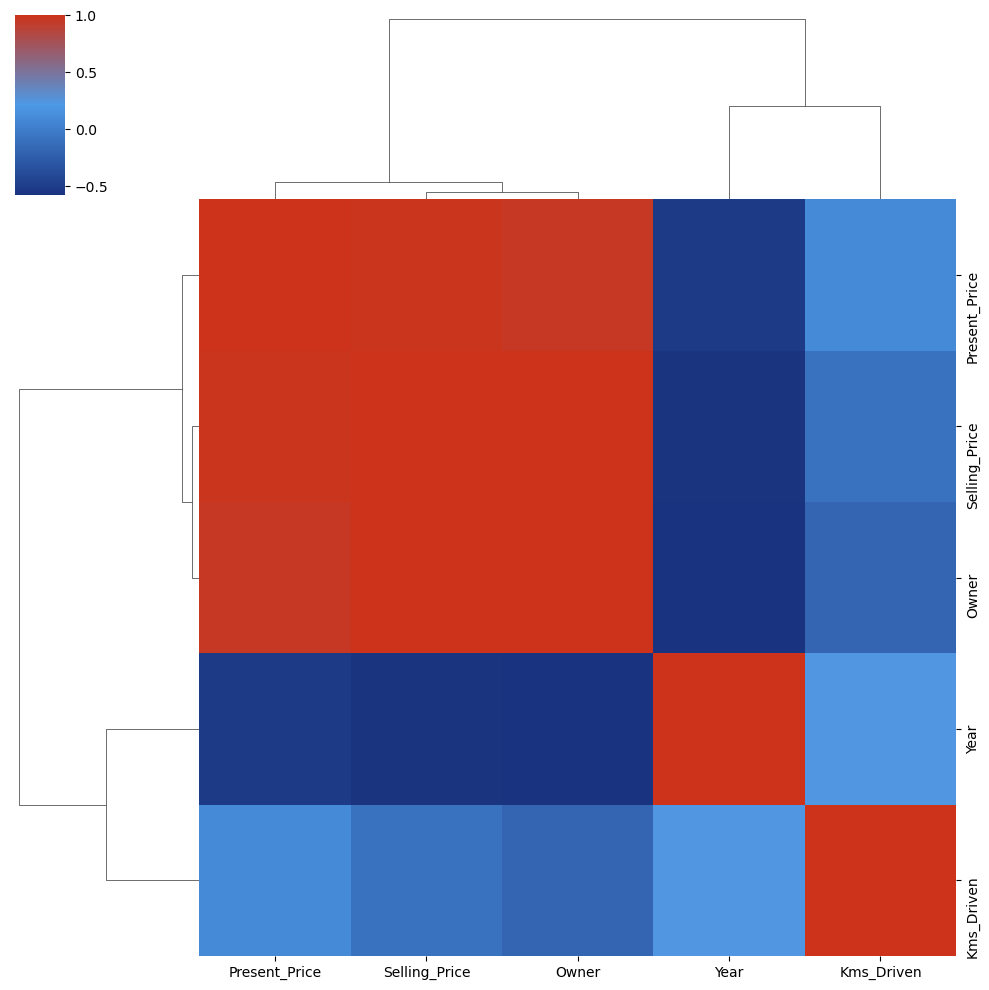

In [30]:
plt.figure(figsize=(10,6))
# Create a custom colormap using RGB values
colors = [(0.1, 0.2, 0.5), (0.3, 0.6, 0.9), (0.8, 0.2, 0.1)]  # RGB values
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

plt.figure(figsize=(10,6))

sns.clustermap(carprice_datasets.describe().corr(),cmap=cmap)
plt.show()

<br>
now we applying the eda

In [31]:
carprice_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


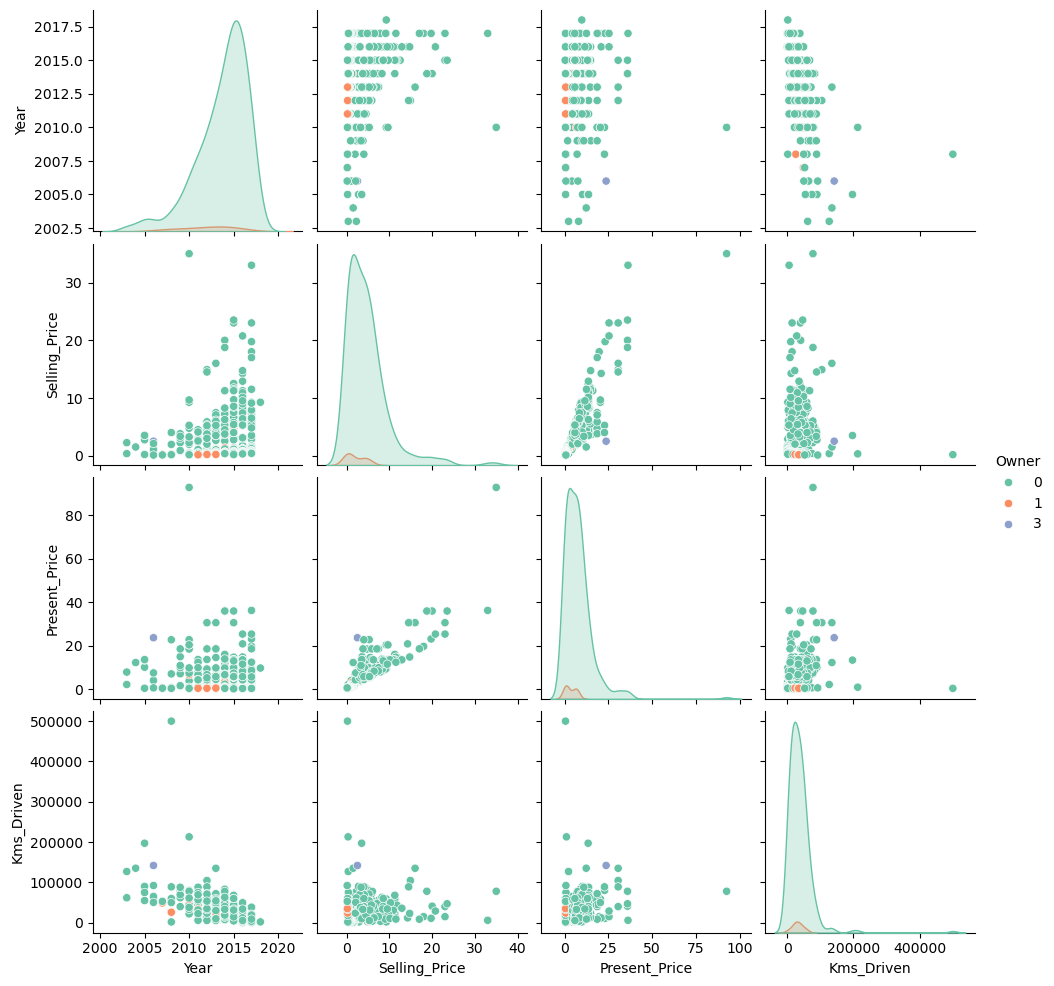

In [32]:
sns.pairplot(carprice_datasets,hue = 'Owner',palette='Set2')
plt.show()

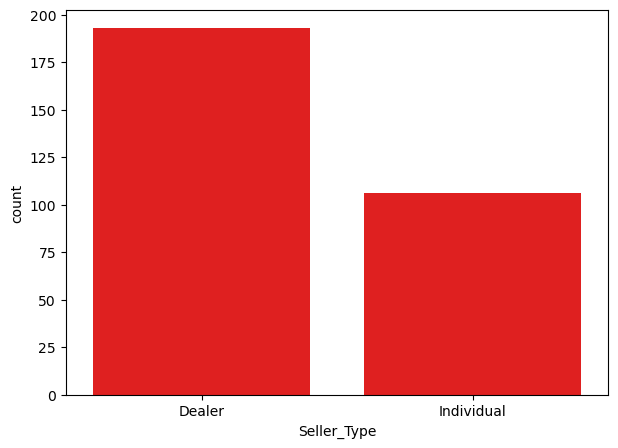

In [33]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'Seller_Type',data = carprice_datasets,color = "r")
plt.show()

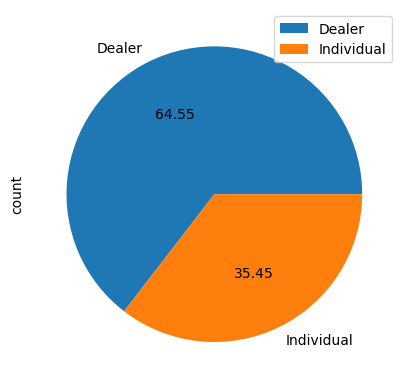

In [35]:
# plt.figure(figsize =(14,9))
carprice_datasets['Seller_Type'].value_counts().plot(kind="pie",autopct = '%.2f')
plt.legend()
plt.show()


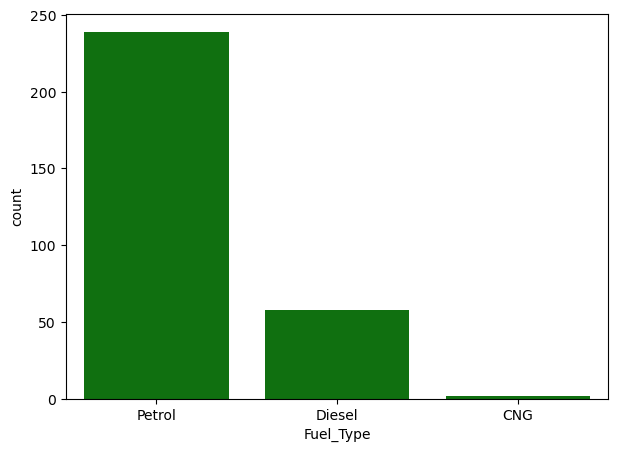

In [36]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'Fuel_Type',data = carprice_datasets,color = "g")
plt.show()

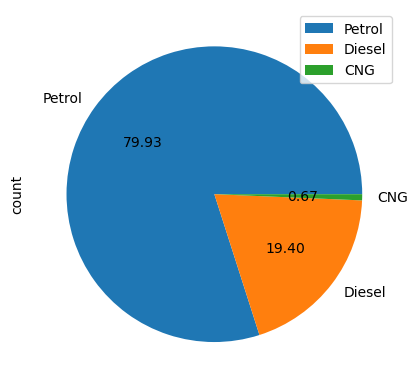

In [37]:
# plt.figure(figsize =(14,9))
carprice_datasets['Fuel_Type'].value_counts().plot(kind="pie",autopct = '%.2f')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\2217385008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Transmission',data = carprice_datasets,palette='Set2')


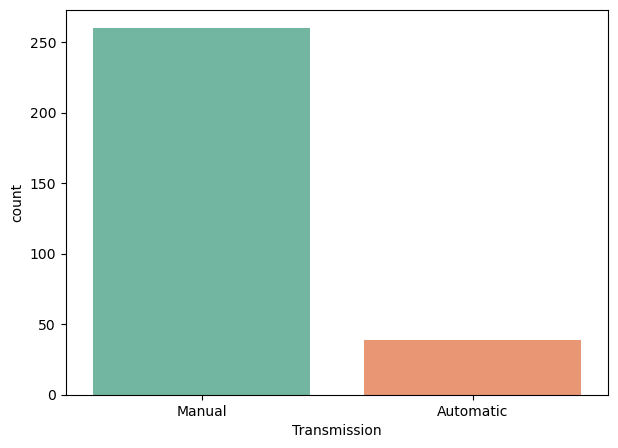

In [38]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'Transmission',data = carprice_datasets,palette='Set2')
plt.show()

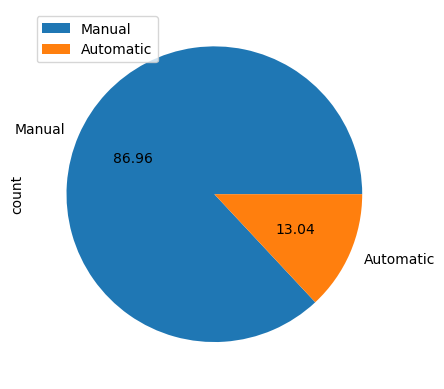

In [39]:
# plt.figure(figsize =(14,9))
carprice_datasets['Transmission'].value_counts().plot(kind="pie",autopct = '%.2f')
plt.legend()
plt.show()

In [40]:
carprice_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
carprice_datasets['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

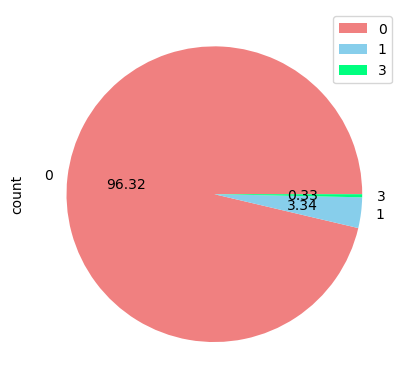

In [42]:
custom_palette = ['lightcoral', 'skyblue','#00FF7F']
# plt.figure(figsize =(14,9))
carprice_datasets['Owner'].value_counts().plot(kind="pie",autopct = '%.2f',colors=custom_palette)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

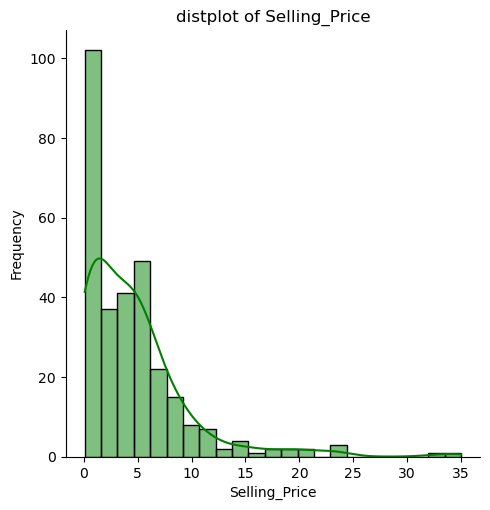

<Figure size 640x480 with 0 Axes>

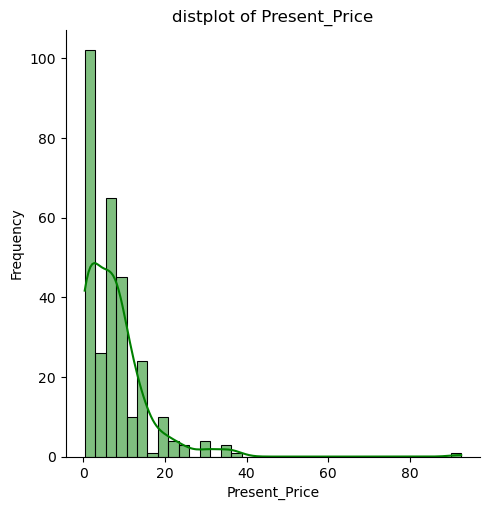

<Figure size 640x480 with 0 Axes>

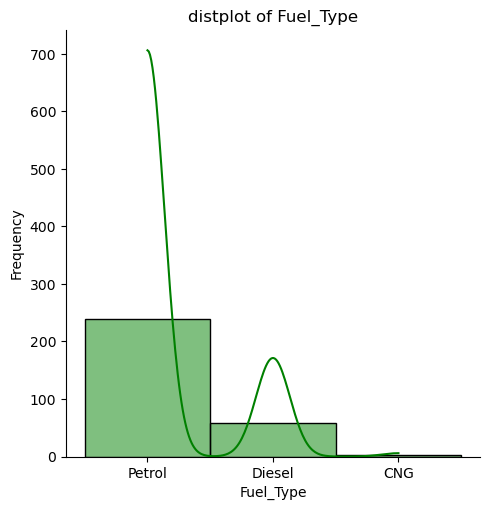

<Figure size 640x480 with 0 Axes>

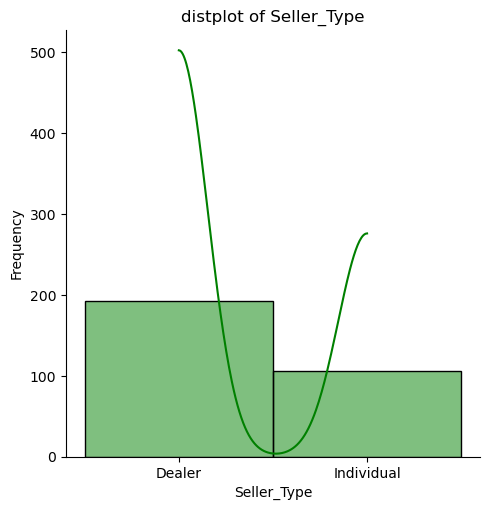

<Figure size 640x480 with 0 Axes>

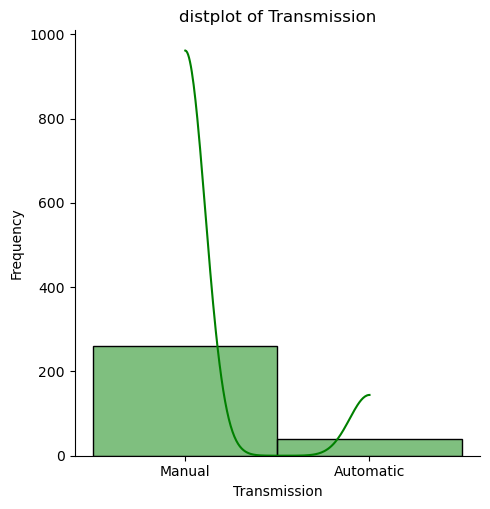

<Figure size 640x480 with 0 Axes>

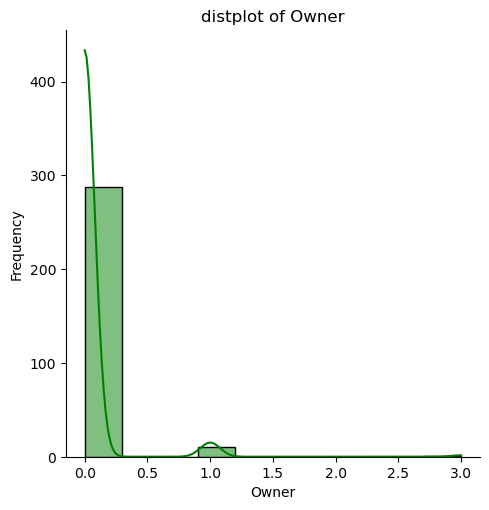

In [43]:
for column in carprice_datasets.columns:
      if column ==  'Year':
        continue
      elif column == 'Present_Price	':
          continue
      elif column == 'Kms_Driven':
          continue
      else :
       plt.figure()# Create a new figure for each plot
       
       sns .displot(carprice_datasets[column],color = "g",kde=True)  # Plot histogram with 10 bins
       plt.xlabel(column)  # Set x-axis label as the column name
       plt.ylabel('Frequency')  # Set y-axis label
       plt.title(f'distplot of {column}')  # Set plot titl
       plt.show() 

<Figure size 640x480 with 0 Axes>

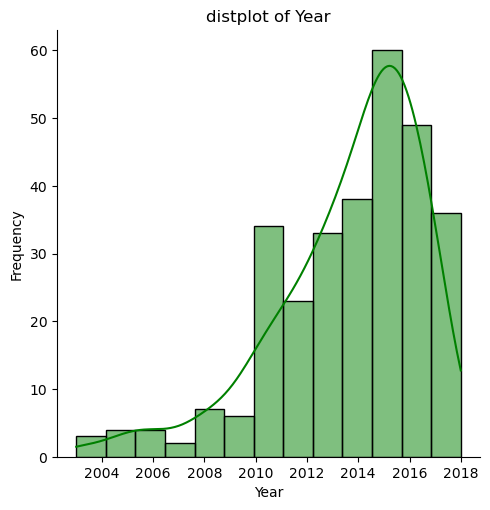

<Figure size 640x480 with 0 Axes>

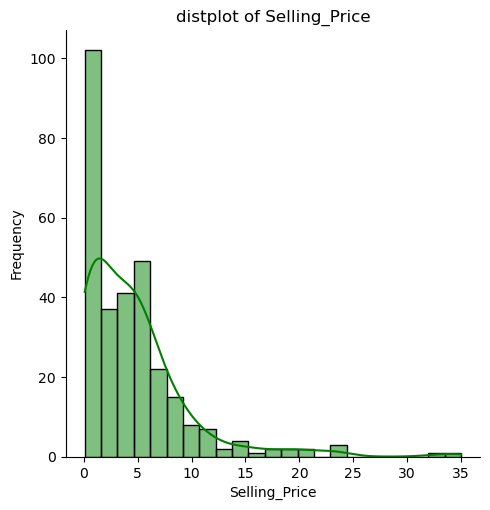

<Figure size 640x480 with 0 Axes>

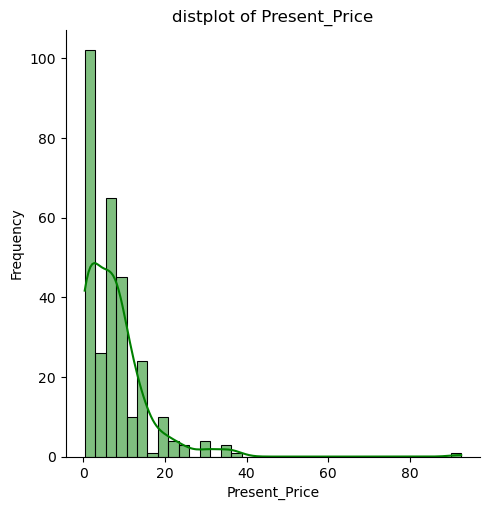

<Figure size 640x480 with 0 Axes>

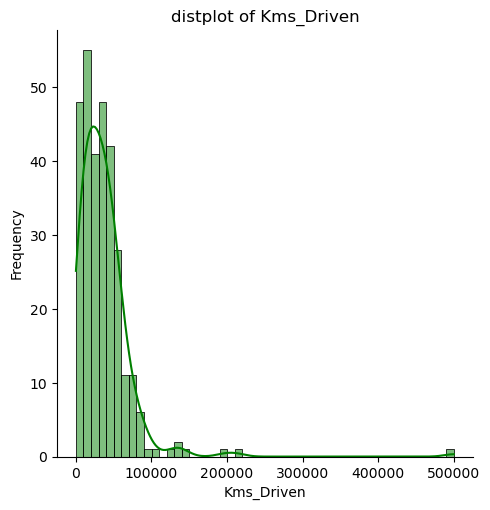

<Figure size 640x480 with 0 Axes>

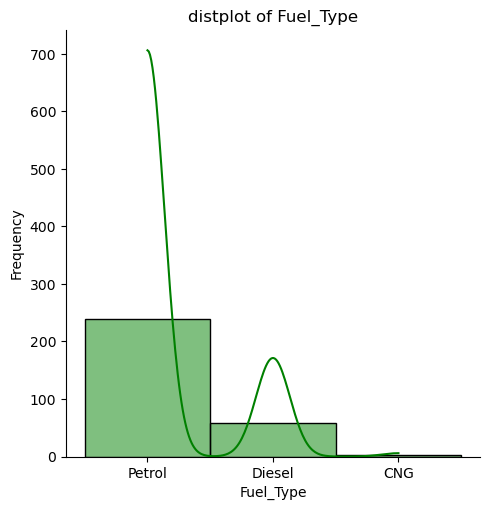

<Figure size 640x480 with 0 Axes>

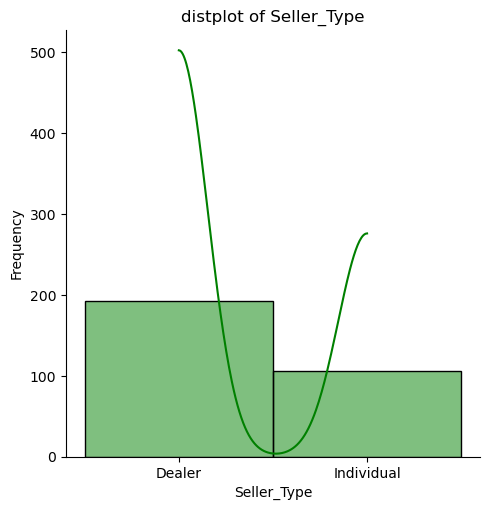

<Figure size 640x480 with 0 Axes>

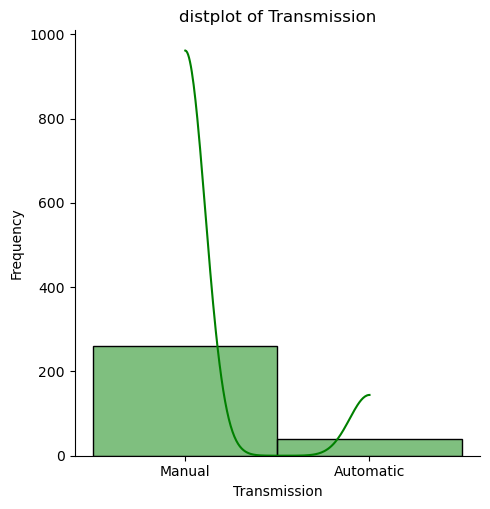

<Figure size 640x480 with 0 Axes>

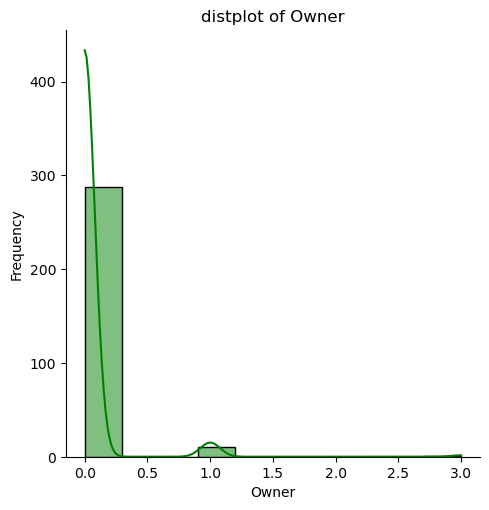

In [44]:
for column in carprice_datasets.columns:
    
       plt.figure()# Create a new figure for each plot
       
       sns .displot(carprice_datasets[column],color = "g",kde=True)  # Plot histogram with 10 bins
       plt.xlabel(column)  # Set x-axis label as the column name
       plt.ylabel('Frequency')  # Set y-axis label
       plt.title(f'distplot of {column}')  # Set plot titl
       plt.show()  

In [45]:
carprice_datasets.shape

(299, 8)

<br>
here we ploting the boxplot 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\4191667404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(carprice_datasets[column], palette="Set3")


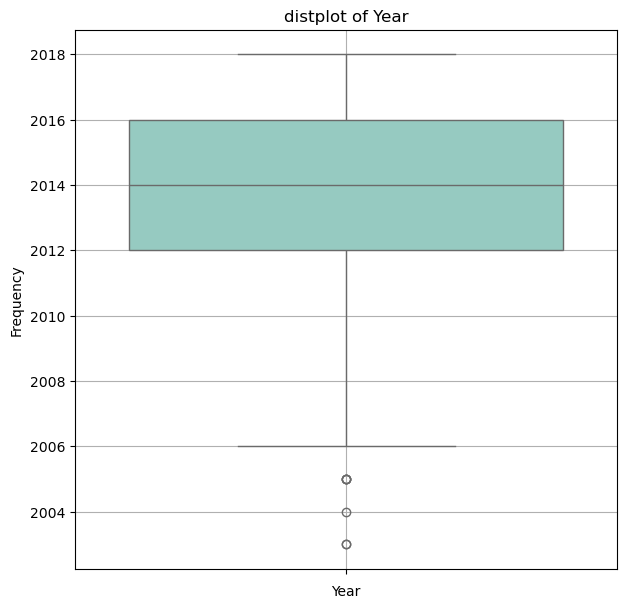

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\4191667404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(carprice_datasets[column], palette="Set3")


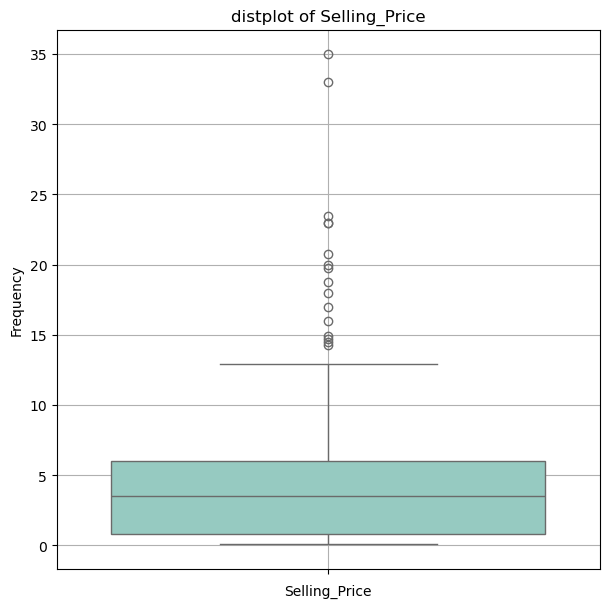

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\4191667404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(carprice_datasets[column], palette="Set3")


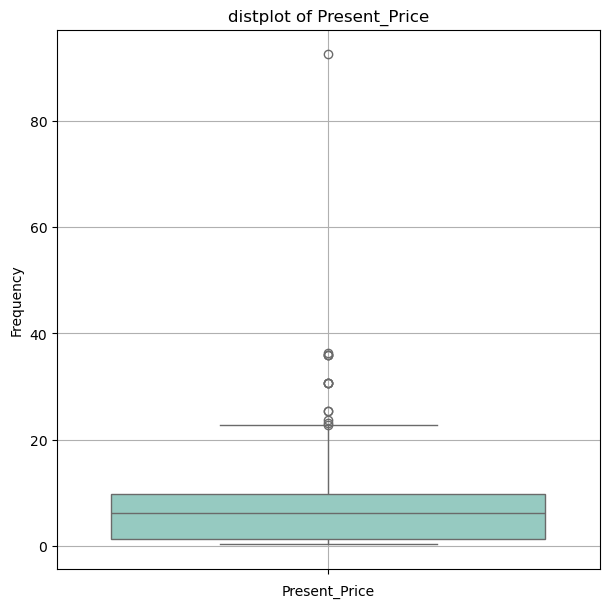

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\4191667404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(carprice_datasets[column], palette="Set3")


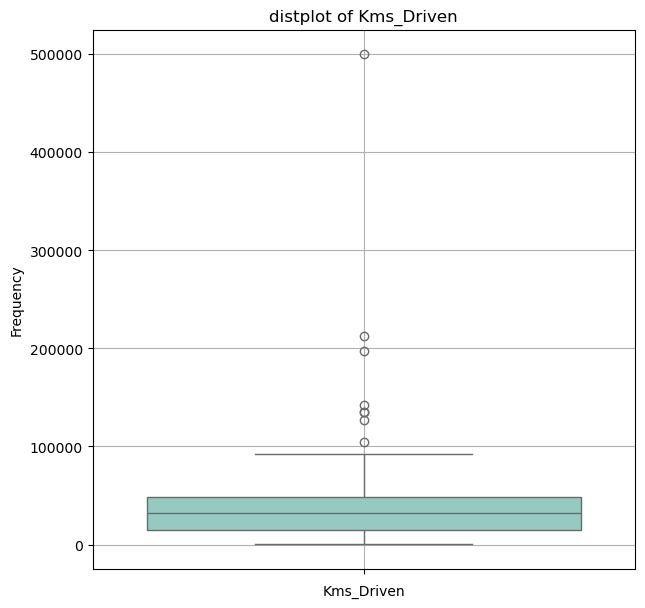

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\4191667404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(carprice_datasets[column], palette="Set3")


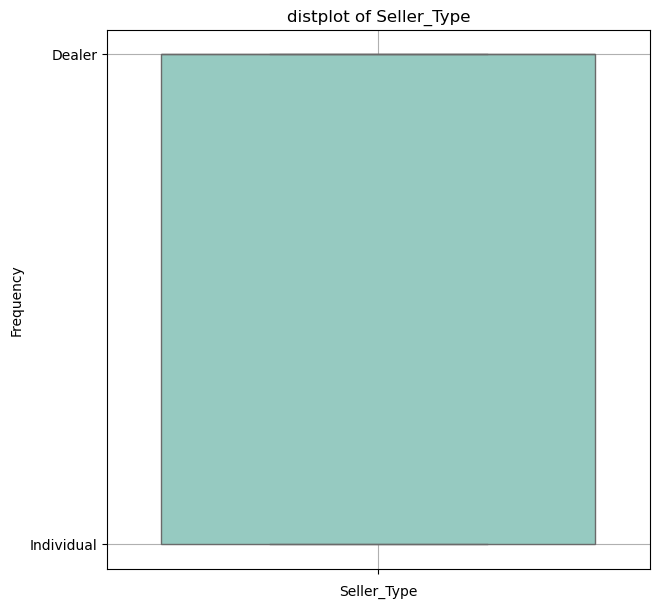

In [46]:
# here in the data we have the outlies
for column in carprice_datasets.columns:
      if column ==  'Car_Name':
        continue
      elif column == 'Fuel_Type':
          continue 
      elif column == 'Seller_Type	':
          continue
      elif column == 'Transmission':
          continue
      elif column == 'Owner':
          continue 
      else :
       plt.figure(figsize =(7,7))# Create a new figure for each plot
       
       sns.boxplot(carprice_datasets[column], palette="Set3")
       plt.xlabel(column)  # Set x-axis label as the column name
       plt.ylabel('Frequency')  # Set y-axis label
       plt.title(f'distplot of {column}')  # Set plot titl
       plt.grid(True)
       plt.show() 

In [47]:
carprice_datasets['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

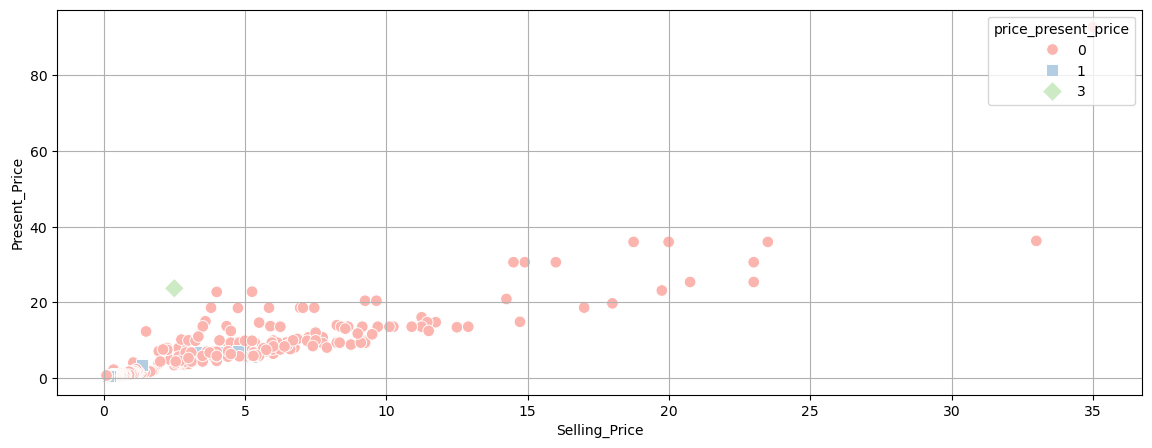

In [48]:
# now we using the scatter plot in the given data
markers = {0: "o", 1: "s", 3: "D"}
# markers = {0:"+",1:"*",3:"^"}
plt.figure(figsize = (14,5))
sns.scatterplot(x="Selling_Price",y="Present_Price",data = carprice_datasets,palette="Pastel1",hue = 'Owner',style = "Owner",size="Owner",sizes=(70,100),
                alpha = 1,markers = markers  )
plt.legend(title='price_present_price', loc='upper right')
# plt.legend( loc='upper right')
plt.grid(True)
plt.show()

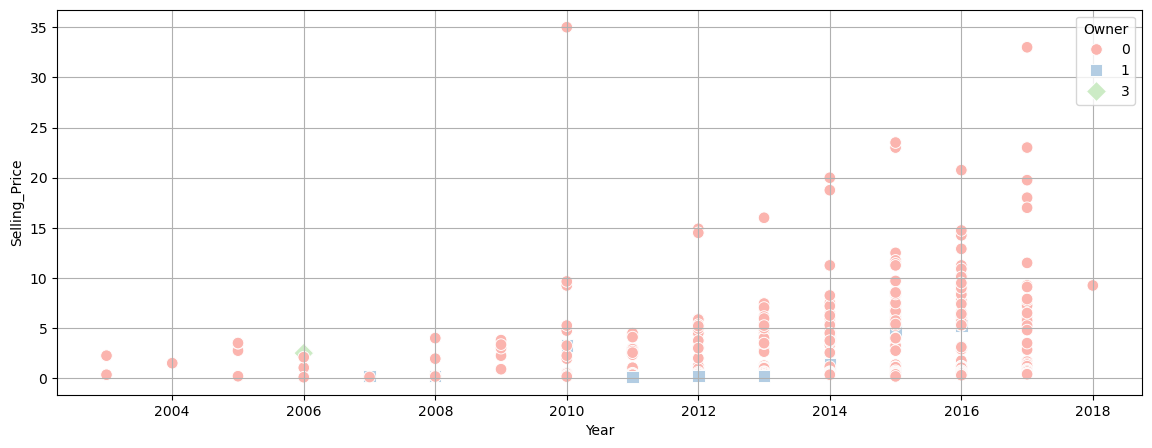

In [49]:
# now we using the scatter plot in the given data
markers = {0: "o", 1: "s", 3: "D"}
# markers = {0:"+",1:"*",3:"^"}
plt.figure(figsize = (14,5))
sns.scatterplot(x="Year",y="Selling_Price",data = carprice_datasets,palette="Pastel1",hue = 'Owner',style = "Owner",size="Owner",sizes=(70,100),
                alpha = 1,markers = markers  )
plt.legend(title='Owner', loc='upper right')
# plt.legend( loc='upper right')
plt.grid(True)
plt.show()

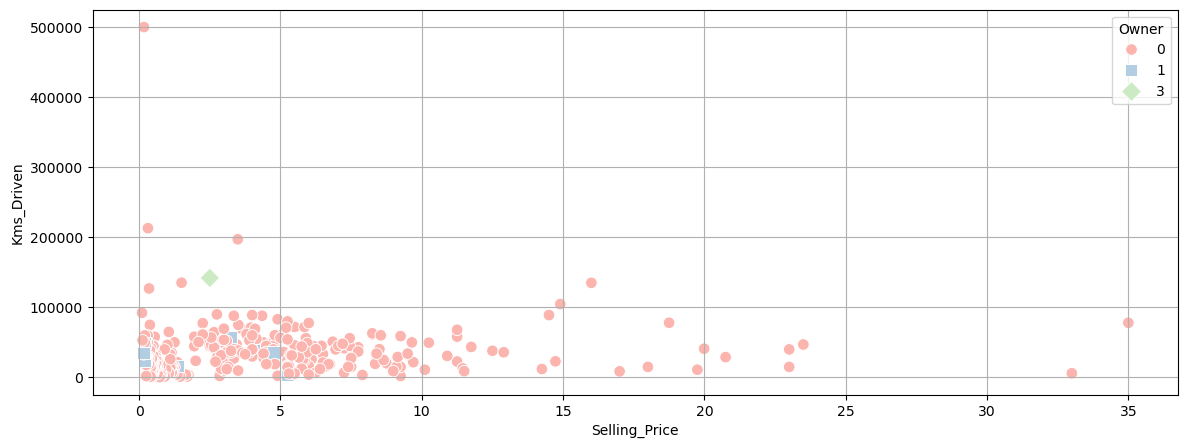

In [50]:
# now we using the scatter plot in the given data
markers = {0: "o", 1: "s", 3: "D"}
# markers = {0:"+",1:"*",3:"^"}
plt.figure(figsize = (14,5))
sns.scatterplot(x="Selling_Price",y="Kms_Driven",data = carprice_datasets,palette="Pastel1",hue = 'Owner',style = "Owner",size="Owner",sizes=(70,100),
                alpha = 1,markers = markers  )
plt.legend(title='Owner', loc='upper right')
# plt.legend( loc='upper right')
plt.grid(True)
plt.show()

In [51]:
carprice_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<br>
here we finding the corelation 

In [52]:

# Assuming spam_detection is your DataFrame
# Identify columns with non-numeric data
non_numeric_columns = carprice_datasets.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric if possible
for col in non_numeric_columns:
    try:
        carprice_datasets[col] = pd.to_numeric(carprice_datasets[col])
    except ValueError:
        # Handle cases where conversion is not possible or needed
        pass

# Drop remaining non-numeric columns if necessary
numeric_data = carprice_datasets.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric data
correlation_matrix = numeric_data.corr()

# # here we finding the correlation
# spam_detection.corr()

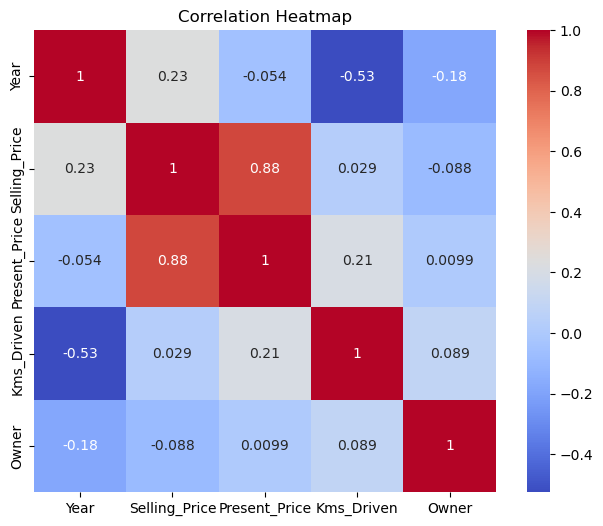

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12980\4272707875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')


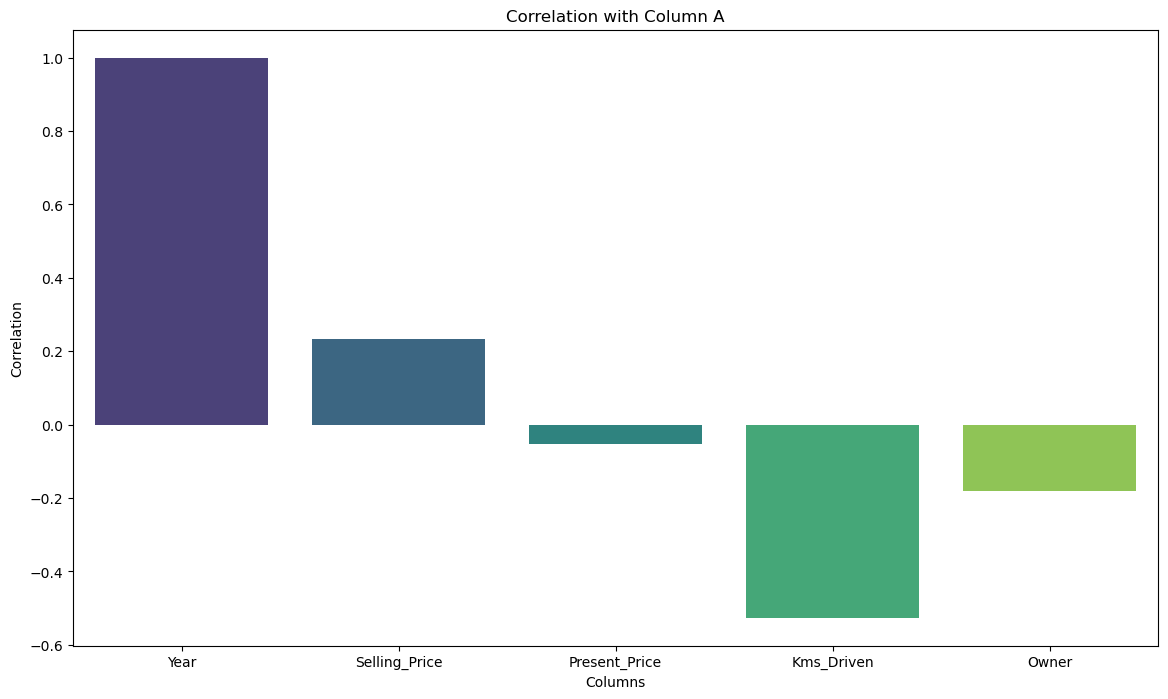

In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()

<br>
now here we dowing the model bulding  

In [55]:
carprice_datasets.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [56]:
x = carprice_datasets.drop('Owner',axis = 1)
y = carprice_datasets['Owner']

In [57]:
x.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [58]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [59]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [60]:
x_train.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual
185,2008,0.25,0.58,1900,Petrol,Individual,Automatic
187,2013,0.25,0.51,32000,Petrol,Individual,Manual
148,2010,0.52,0.94,45000,Petrol,Individual,Manual
31,2011,2.35,4.89,54200,Petrol,Dealer,Manual


In [61]:
x_test.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
283,2016,8.99,11.80,9010,Petrol,Dealer,Manual
267,2016,8.35,9.40,19434,Diesel,Dealer,Manual
166,2016,0.45,0.55,1000,Petrol,Individual,Manual
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual
78,2010,5.25,22.83,80000,Petrol,Dealer,Automatic


In [62]:
y_train

6      0
185    0
187    0
148    0
31     0
      ..
190    0
72     0
108    0
272    0
104    0
Name: Owner, Length: 239, dtype: int64

In [63]:
y_test

283    0
267    0
166    0
9      0
78     0
280    0
95     0
111    0
5      0
175    0
99     0
197    0
186    0
156    0
58     1
61     0
149    0
110    0
64     0
142    0
157    0
106    1
249    0
47     0
43     0
277    0
282    0
118    0
215    0
238    0
18     0
241    1
34     0
25     0
46     0
7      0
115    0
196    0
113    0
94     0
76     0
83     0
120    0
77     0
131    0
199    0
212    0
290    0
221    0
180    0
146    0
188    0
85     3
250    0
279    0
74     0
246    0
26     0
211    0
60     0
Name: Owner, dtype: int64

In [64]:
# now we using the columns transfomer 
trf1 = ColumnTransformer([
  # ('scale',StandardScaler(),slice(0, 9)),[0,1,2,3],
  ('ohe_sex_embarked',OneHotEncoder(sparse_output = False,drop='first',handle_unknown = 'ignore'),[4,5,6])
  
],remainder = 'passthrough') #

In [65]:
# categorical_features = [4,5,6]# Add other categorical columns as needed
# numeric_features = [col for col in x_train.columns if col not in categorical_features]

# # Define preprocessing steps for each type of column
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
# ])
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])


In [66]:
# # Combine transformers using ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ('cat', categorical_transformer, categorical_features),
#     ('num', numeric_transformer, numeric_features)
# ])

In [67]:
x_train_trf = trf1.fit_transform(x_train)
x_train_trf.shape

(239, 8)

In [68]:
x_test_trf = trf1.transform(x_test)
x_test_trf.shape

(60, 8)

In [69]:
x_train.shape

(239, 7)

In [70]:
x_test_trf.shape

(60, 8)

In [71]:
x_train_trf = pd.DataFrame(x_train_trf)
# x_train_trf = pd.DataFrame(x_train_trf,columns = ['Year',])
x_train_trf

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,1.0,2015.0,6.75,8.12,18796.0
1,0.0,1.0,1.0,0.0,2008.0,0.25,0.58,1900.0
2,0.0,1.0,1.0,1.0,2013.0,0.25,0.51,32000.0
3,0.0,1.0,1.0,1.0,2010.0,0.52,0.94,45000.0
4,0.0,1.0,0.0,1.0,2011.0,2.35,4.89,54200.0
...,...,...,...,...,...,...,...,...
234,0.0,1.0,1.0,1.0,2008.0,0.20,0.75,60000.0
235,0.0,1.0,0.0,1.0,2013.0,7.45,18.61,56001.0
236,0.0,1.0,1.0,1.0,2016.0,1.20,1.50,18000.0
237,0.0,1.0,0.0,1.0,2015.0,7.50,10.00,27600.0


In [72]:
x_test_trf = pd.DataFrame(x_test_trf)
# x_train_trf = pd.DataFrame(x_train_trf,columns = ['Year',])
x_test_trf

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,1.0,2016.0,8.99,11.800,9010.0
1,1.0,0.0,0.0,1.0,2016.0,8.35,9.400,19434.0
2,0.0,1.0,1.0,1.0,2016.0,0.45,0.550,1000.0
3,1.0,0.0,0.0,1.0,2015.0,7.45,8.920,42367.0
4,0.0,1.0,0.0,0.0,2010.0,5.25,22.830,80000.0
5,0.0,1.0,0.0,1.0,2015.0,5.25,5.900,14465.0
6,0.0,1.0,0.0,1.0,2012.0,5.85,18.610,72000.0
7,0.0,1.0,1.0,1.0,2016.0,1.15,1.500,8700.0
8,1.0,0.0,0.0,1.0,2018.0,9.25,9.830,2071.0
9,0.0,1.0,1.0,1.0,2011.0,0.38,0.787,75000.0


In [73]:
# now reading the the model in the datafrme 
log_reg = LogisticRegression()
log_reg.fit(x_train_trf,y_train)

LogisticRegression()

In [74]:
y_pred = log_reg.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.9333333333333333

In [75]:
svm_clf = SVC()
svm_clf.fit(x_train_trf,y_train)

SVC()

In [76]:
y_pred = log_reg.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.9333333333333333

In [77]:
# Instantiate and train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train_trf, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = tree_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.9

In [79]:
multinomial_nb_clf = MultinomialNB()
multinomial_nb_clf.fit(x_train_trf,y_train)

MultinomialNB()

In [80]:
y_pred = multinomial_nb_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.5333333333333333

In [81]:
# Instantiate and train a Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_trf, y_train)

RandomForestClassifier()

In [82]:
y_pred = rf_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.9166666666666666

In [83]:
# Instantiate and train a Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(x_train_trf, y_train)


GradientBoostingClassifier()

In [84]:
y_pred =gbm_clf .predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.9166666666666666

In [85]:
# Instantiate and train a Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(x_train_trf, y_train)

GaussianNB()

In [86]:
y_pred =nb_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8833333333333333

In [87]:
# Instantiate and train a K-Nearest Neighbors (KNN) Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [88]:
y_pred =knn_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.9333333333333333

In [89]:
ab_clf =  AdaBoostClassifier()
ab_clf.fit(x_train_trf,y_train)

AdaBoostClassifier()

In [90]:
pred = ab_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.9333333333333333

In [91]:
Bagg_clf = BaggingClassifier()
Bagg_clf.fit(x_train_trf,y_train)

BaggingClassifier()

In [92]:
pred = Bagg_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.9333333333333333

In [93]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
pred = xgb_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.9333333333333333

In [95]:
input_data =  (0.0,1.0,1.0,1.0,2013.0,0.25,0.51,32000.0)

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)
prediction = log_reg.predict(input_data_reshaped)

prediction

if (prediction ==0):
    print('fist Owner')

elif (prediction ==1):
    print('2nd Owner')

else :
  print('3rd Owner')


fist Owner
